In [4]:
from IPython.display import display, Math
import random
import matplotlib.pyplot as plt
import math

In [12]:
display(Math("Non-Stationary \\ k-bandits \\ simulator"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("A \\gets \lbrace ^{argmax_{a} \\ Q(a) \\ P \\ = \\ 1 \\ - \\ \\epsilon} _{\\ rand(a) \\ p \\ = \\ \\epsilon} "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q_{n+1} \\gets Q_{n} + \\alpha[R_{n} \\ - \\ Q_{n}]"))
display(Math("q_{*}(n+1) \\gets q_{*}(n) + rand(n)"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
# k-bandits
k = 10

# q*(a) = E[Rt|At =a]
expectation = [random.uniform(-1, 1) for i in range(k)]

# epsilon - exploration
epsilon = 0.01

# number of simulation runs  
runs = 2000

# number of time steps
times = 1000

# alpha step size parameter
alpha = 0.1

# Q(A) estimate of action-value method - 
Q = [0] * k

# N(A) action count - 
N = [0] * k

# A = action at time step t
A = 0

# number of times a taken prior to t
reward_distribution = []

In [32]:
def bandit(A, q):
    """
    Returns expected q*(a)
    """
    q[A] += (q[A] + random.gauss(0, 0.01))
    return q[A]


def reset(Q, N, k):
    for a in range(k):

        # reset estimates
        Q[a] = random.random()

        # reset N(A) action count - 
        N[a] = 0
    
    return Q, N

In [33]:
# Non-stationary k-bandits problem

# 2000 runs
for r in range(runs):
    
    # reset values
    Q, N = reset(Q, N, k)
    sum_of_rewards = 0
    
    # Incremental Implementation at 1000 times per run
    for n in range(1, times+1):

        # Argmax Q
        A = Q.index(max(Q))

        # random
        if random.randint(1,100)/100.0 <= epsilon:
            A = random.randint(0,9)

        # reward for a at time step t
        R = bandit(A, expectation)

        # Update Action-Value Method
        Q[A] += (Q[A] + alpha*(R - Q[A]))

        # keep count of each action
        N[A] += 1

        # sum of rewards when a taken prior to t
        sum_of_rewards += R

        # average reward
        average = sum_of_rewards/n

        # add to reward distribution
        reward_distribution.append(average)


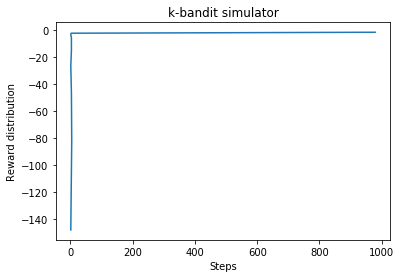

In [34]:
plt.xlabel('Steps')
plt.ylabel('Reward distribution')
plt.title("k-bandit simulator")
plt.plot(N, reward_distribution[:k])
plt.show()